In [1]:
import tellurium as te
import controlSBML as ctl
import control
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = """
// Created by libAntimony v2.13.2
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"


model *Reddyhoff2015()

  // Compartments and Species:
  compartment compartment_;
  species Sulphate__PAPS in compartment_, GSH in compartment_, NAPQI in compartment_;
  species Paracetamol_APAP in compartment_, Protein_adducts in compartment_;

  // Reactions:
  reaction_1: Paracetamol_APAP => NAPQI; compartment_*k450*Paracetamol_APAP;
  R2: NAPQI => Paracetamol_APAP; compartment_*kN*NAPQI;
  R3: Paracetamol_APAP => ; compartment_*kG*Paracetamol_APAP;
  R4: NAPQI => Protein_adducts; compartment_*kPSH*NAPQI;
  R5: NAPQI + GSH => ; compartment_*kGSH*NAPQI*GSH;
  R6: GSH => ; compartment_*dG*GSH;
  R7:  => GSH; compartment_*Constant_flux__irreversible(bG);
  R8: Paracetamol_APAP + Sulphate__PAPS => ; compartment_*kS*Paracetamol_APAP*Sulphate__PAPS;
  R9: Sulphate__PAPS => ; compartment_*dS*Sulphate__PAPS;
  R10:  => Sulphate__PAPS; compartment_*Constant_flux__irreversible(bS);

  // Species initializations:
  Sulphate__PAPS = bS/dS;
  GSH = bG/dG;
  NAPQI = 0;
  Paracetamol_APAP = P0;
  Protein_adducts = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  bS = 2.65e-14;
  dS = 2;
  bG = 1.374e-14;
  dG = 2;
  P0 = 1.32e-13;
  kGSH = 1.6e+18;
  kG = 2.99;
  kS = 226000000000000;
  k450 = 0.315;
  kN = 0.0315;
  kPSH = 110;

  // Other declarations:
  const compartment_, bS, dS, bG, dG, P0, kGSH, kG, kS, k450, kN, kPSH;

  // Unit definitions:
  unit volume = 1e-3 litre;
  unit substance = 1e-3 mole;

  // Display Names:
  compartment_ is "compartment";
  Sulphate__PAPS is "Sulphate_PAPS";
  reaction_1 is "R1";

  // CV terms:
  compartment_ model_entity_is "http://identifiers.org/bto/BTO:0000759"
  Sulphate__PAPS identity "http://identifiers.org/chebi/CHEBI:17980"
  GSH identity "http://identifiers.org/chebi/CHEBI:16856"
  NAPQI hypernym "http://identifiers.org/uniprot/P15559"
  Paracetamol_APAP identity "urn:miriam:chembl.compound:+CHEMBL112"
  Protein_adducts part "http://identifiers.org/chebi/CHEBI:36080",
                       "http://identifiers.org/chembl.compound/CHEMBL112"
end

Reddyhoff2015 is "Reddyhoff2015 - Acetaminophen metabolism and toxicity"

Reddyhoff2015 model_entity_is "http://identifiers.org/biomodels.db/MODEL1603080000"
Reddyhoff2015 model_entity_is "http://identifiers.org/biomodels.db/BIOMD0000000609"
Reddyhoff2015 description "http://identifiers.org/pubmed/26348886"
Reddyhoff2015 origin "http://identifiers.org/pubmed/26966512"
Reddyhoff2015 container "http://identifiers.org/bto/BTO:0000759"
Reddyhoff2015 taxon "http://identifiers.org/taxonomy/9606"
Reddyhoff2015 hypernym "http://identifiers.org/go/GO:1901554"
Reddyhoff2015 property "http://identifiers.org/mamo/MAMO_0000046"

"""

In [2]:
URL = 'https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1603080000/3/BIOMD0000000609_url.xml'
CTLSB = ctl.ControlSBML(URL)
print(CTLSB.getAntimony())  # View the Antimony

// Created by libAntimony v2.13.2
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"


model *Reddyhoff2015()

  // Compartments and Species:
  compartment compartment_;
  species Sulphate__PAPS in compartment_, GSH in compartment_, NAPQI in compartment_;
  species Paracetamol_APAP in compartment_, Protein_adducts in compartment_;

  // Reactions:
  reaction_1: Paracetamol_APAP => NAPQI; compartment_*k450*Paracetamol_APAP;
  R2: NAPQI => Paracetamol_APAP; compartment_*kN*NAPQI;
  R3: Paracetamol_APAP => ; compartment_*kG*Paracetamol_APAP;
  R4: NAPQI => Protein_adducts; compartment_*kPSH*NAPQI;
  R5: NAPQI + GSH => ; compartment_*kGSH*NAPQI*GSH;
  R6: GSH => ; compartment_*dG*GSH;
  R7:  => GSH; compartment_*Constant_flux__irreversible(bG);
  R8: Paracetamol_APAP + Sulphate__PAPS => ; compartment_*kS*Paracetamol_APAP*Sulphate__PAPS;
  R9: Sulphate__PAPS => ; compartment_*dS*Sulphate__PAPS;
  R10:  => Sulphate__PAPS; compartme

In [3]:
ctslb = ctl.ControlSBML(URL, input_name="Paracetamol_APAP", output_name="Sulphate__PAPS")

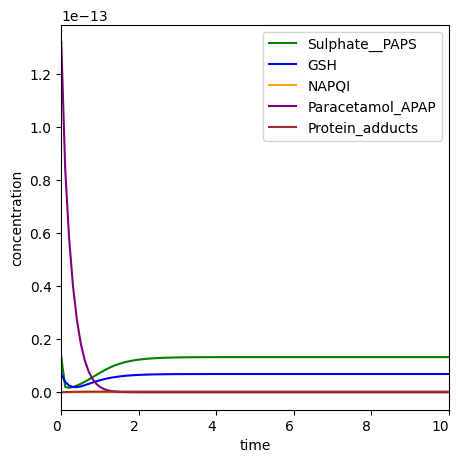

In [4]:
_ = CTLSB.plotModel()

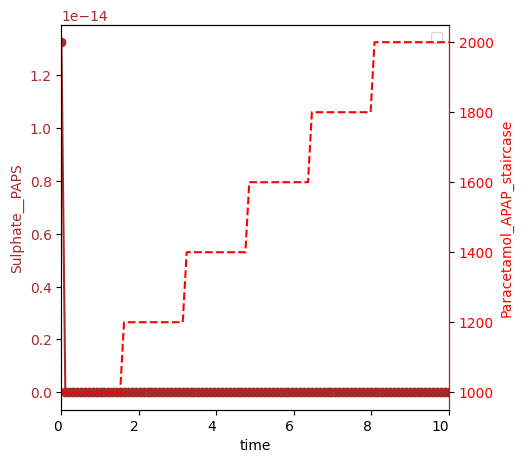

In [12]:
CTLSB = ctl.ControlSBML(URL, input_name="Paracetamol_APAP", output_name="Sulphate__PAPS")

# Now try plotting the staircase response
_ = CTLSB.plotStaircaseResponse(initial_value=1000, final_value=2000, times=np.linspace(0, 10, 100))

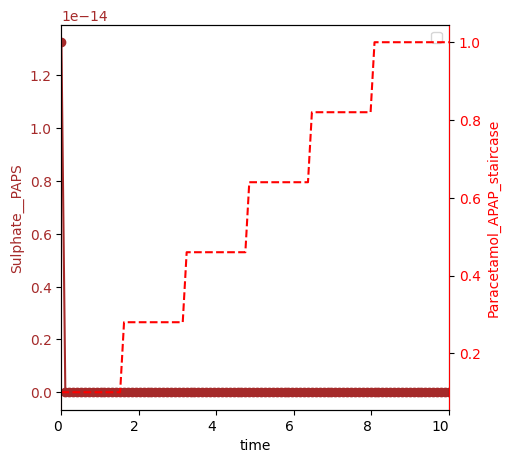

In [6]:
_ = CTLSB.plotStaircaseResponse(initial_value=0.1, final_value=1,
                            times=np.linspace(0, 10, 100))

#what is a list index out of range error?

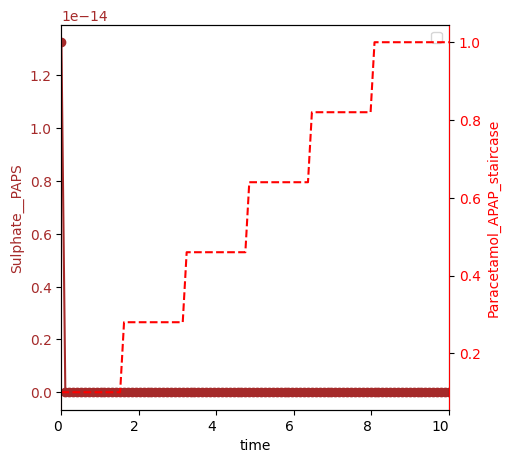

In [7]:
#what google colab suggested I do to fix the error

input_name = "Paracetamol_APAP"
output_name = "Sulphate__PAPS"

# Verify that these species exist in the model
model = te.loadSBMLModel(URL)
species_ids = model.getFloatingSpeciesIds()
if input_name not in species_ids:
    raise ValueError(f"Input species '{input_name}' not found in the model.")
if output_name not in species_ids:
    raise ValueError(f"Output species '{output_name}' not found in the model.")

# If the species exist, but are not properly connected, the error might still occur.
# You'll need to check your model's structure and ensure a valid path
# from the input to the output species.

# Re-initialize ControlSBML with verified input and output
CTLSB = ctl.ControlSBML(URL, input_name=input_name, output_name=output_name)

# Now try plotting the staircase response
_ = CTLSB.plotStaircaseResponse(initial_value=0.1, final_value=1, times=np.linspace(0, 10, 100))
#ctslb = ctl.ControlSBML(URL, input_name="Paracetamol_APAP", output_name="Sulphate__PAPS")